<a href="https://colab.research.google.com/github/ankitg-02/customer-purchase-and-transactional-behavoiur-analysis/blob/main/CPTBA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

**For Transaction Data**

In [20]:
data = pd.read_csv(r'/content/QVI_transaction_data.csv')
transaction=pd.DataFrame(data)
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2.0,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3.0,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8


In [21]:
transaction.shape

(202561, 8)

In [22]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          1
TOT_SALES         1
dtype: int64

In [23]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202561 entries, 0 to 202560
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            202561 non-null  int64  
 1   STORE_NBR       202561 non-null  int64  
 2   LYLTY_CARD_NBR  202561 non-null  int64  
 3   TXN_ID          202561 non-null  int64  
 4   PROD_NBR        202561 non-null  int64  
 5   PROD_NAME       202561 non-null  object 
 6   PROD_QTY        202560 non-null  float64
 7   TOT_SALES       202560 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 12.4+ MB


In [24]:
transaction['DATE']=pd.to_datetime(transaction['DATE'])

In [25]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202561 entries, 0 to 202560
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            202561 non-null  datetime64[ns]
 1   STORE_NBR       202561 non-null  int64         
 2   LYLTY_CARD_NBR  202561 non-null  int64         
 3   TXN_ID          202561 non-null  int64         
 4   PROD_NBR        202561 non-null  int64         
 5   PROD_NAME       202561 non-null  object        
 6   PROD_QTY        202560 non-null  float64       
 7   TOT_SALES       202560 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 12.4+ MB


In [26]:
for i in transaction.columns:
  print(i,':',transaction[i].unique())

DATE : <DatetimeArray>
['1970-01-01 00:00:00.000043390', '1970-01-01 00:00:00.000043599',
 '1970-01-01 00:00:00.000043605', '1970-01-01 00:00:00.000043329',
 '1970-01-01 00:00:00.000043330', '1970-01-01 00:00:00.000043604',
 '1970-01-01 00:00:00.000043601', '1970-01-01 00:00:00.000043332',
 '1970-01-01 00:00:00.000043602', '1970-01-01 00:00:00.000043603',
 ...
 '1970-01-01 00:00:00.000043488', '1970-01-01 00:00:00.000043577',
 '1970-01-01 00:00:00.000043630', '1970-01-01 00:00:00.000043476',
 '1970-01-01 00:00:00.000043346', '1970-01-01 00:00:00.000043425',
 '1970-01-01 00:00:00.000043595', '1970-01-01 00:00:00.000043442',
 '1970-01-01 00:00:00.000043495', '1970-01-01 00:00:00.000043505']
Length: 364, dtype: datetime64[ns]
STORE_NBR : [  1   2   4   5   7   8   9  13  19  20  22  23  25  33  36  38  39  41
  43  45  51  54  55  56  58  59  60  62  63  67  71  72  74  75  80  81
  82  83  84  88  94  96  97 101 102 104 106 109 110 111 112 114 115 116
 118 119 120 122 125 128 129 130 133

In [27]:
transaction.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,202561,202561.000000,2.025610e+05,2.025610e+05,202561.000000,202561,202560.000000,202560.000000
unique,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Tortilla ChpsHny&Jlpno Chili 150g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2537,NaN,NaN
mean,1970-01-01 00:00:00.000043463,134.056817,1.345255e+05,1.341359e+05,56.564852,NaN,1.917007,7.341250
min,1970-01-01 00:00:00.000043282,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,1970-01-01 00:00:00.000043373,69.000000,6.924200e+04,6.737000e+04,28.000000,NaN,2.000000,5.600000
50%,1970-01-01 00:00:00.000043464,130.000000,1.300300e+05,1.337650e+05,56.000000,NaN,2.000000,7.400000
75%,1970-01-01 00:00:00.000043555,201.000000,2.012380e+05,2.009560e+05,85.000000,NaN,2.000000,9.200000
max,1970-01-01 00:00:00.000043646,272.000000,2.370961e+06,2.415841e+06,114.000000,NaN,200.000000,650.000000


In [47]:
#replacing 'nan' values with their repective mean values
transaction['PROD_QTY'].replace('nan',round(transaction['PROD_QTY'].mean()),inplace=True)
transaction['TOT_SALES'].replace('nan',transaction['TOT_SALES'].mean(),inplace=True)

In [29]:
for i in transaction.columns:
  print(i,':',len(transaction[i].unique()))

DATE : 364
STORE_NBR : 271
LYLTY_CARD_NBR : 52681
TXN_ID : 201178
PROD_NBR : 114
PROD_NAME : 115
PROD_QTY : 7
TOT_SALES : 113


<ipython-input-30-00a3d7a11ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['TOT_SALES'])


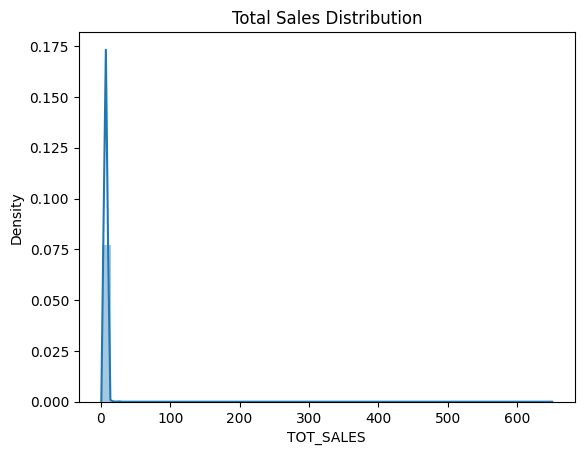

In [30]:
sns.distplot(transaction['TOT_SALES'])
plt.title("Total Sales Distribution")
plt.show()

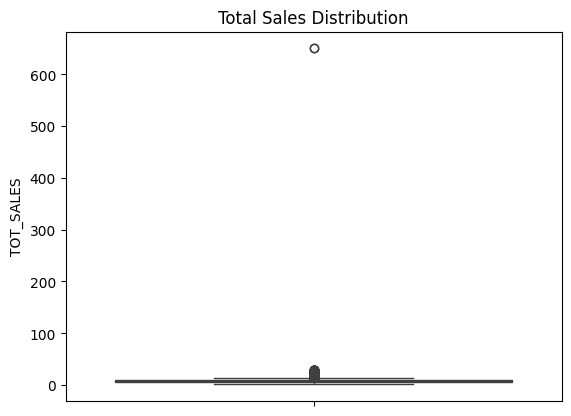

In [31]:
sns.boxplot(transaction['TOT_SALES'])
plt.title("Total Sales Distribution")
plt.show()

<ipython-input-32-f75ed626a49d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['PROD_QTY'])


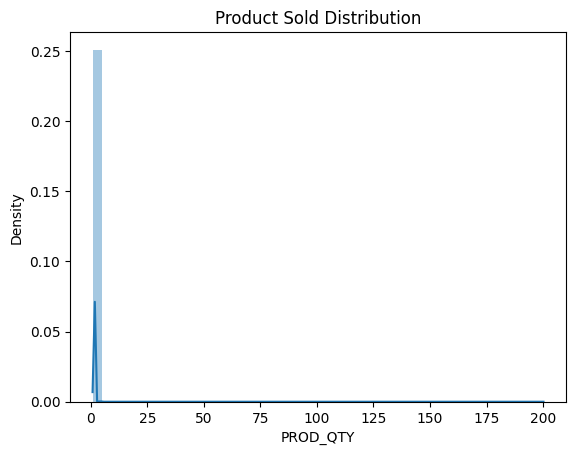

In [32]:
sns.distplot(transaction['PROD_QTY'])
plt.title("Product Sold Distribution")
plt.show()

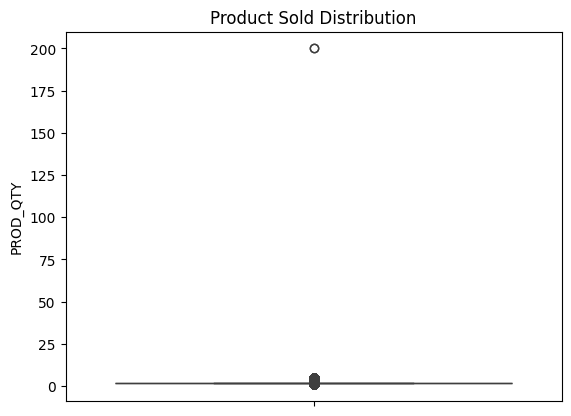

In [33]:
sns.boxplot(transaction['PROD_QTY'])
plt.title("Product Sold Distribution")
plt.show()

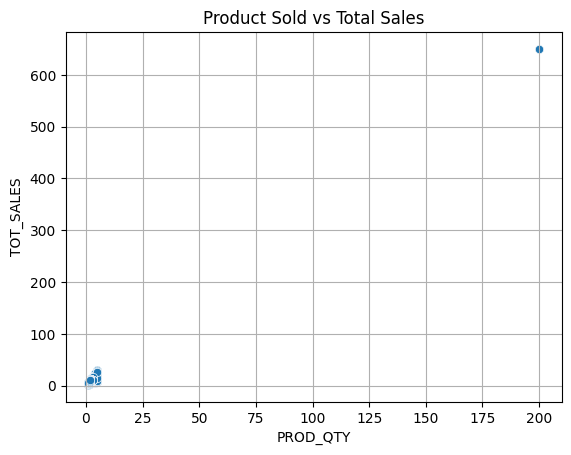

In [34]:
sns.scatterplot(x=transaction['PROD_QTY'],y=transaction['TOT_SALES'])
plt.title("Product Sold vs Total Sales")
plt.grid(True)
plt.show()

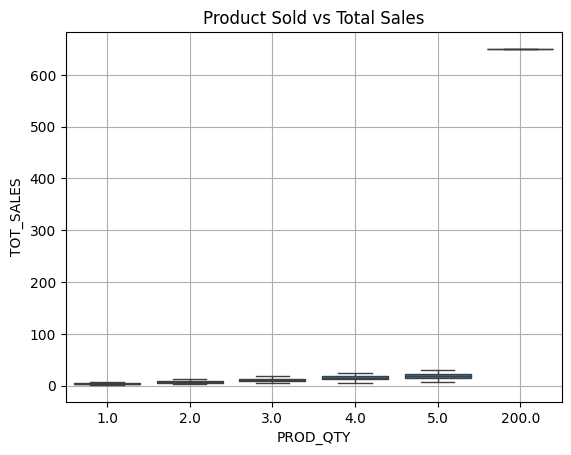

In [35]:
sns.boxplot(x=transaction['PROD_QTY'],y=transaction['TOT_SALES'])
plt.title("Product Sold vs Total Sales")
plt.grid(True)
plt.show()

**For Purchase Behaviour**

In [36]:
data1=pd.read_csv(r'/content/QVI_purchase_behaviour.csv')
purchase=pd.DataFrame(data1)
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [37]:
purchase.shape

(72637, 3)

In [38]:
purchase.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [39]:
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [40]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [41]:
for i in purchase.columns:
  print(i,':',purchase[i].unique())

LYLTY_CARD_NBR : [   1000    1002    1003 ... 2370751 2370961 2373711]
LIFESTAGE : ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
PREMIUM_CUSTOMER : ['Premium' 'Mainstream' 'Budget']


In [42]:
for i in purchase.columns:
  print(purchase[i].value_counts())

LYLTY_CARD_NBR
1000       1
181211     1
181217     1
181216     1
181215     1
          ..
88126      1
88127      1
88128      1
88129      1
2373711    1
Name: count, Length: 72637, dtype: int64
LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64
PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


In [43]:
purchase.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


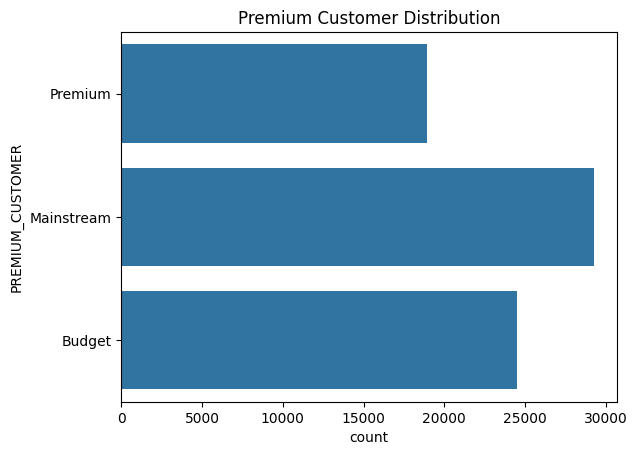

In [44]:
sns.countplot(purchase['PREMIUM_CUSTOMER'])
plt.title("Premium Customer Distribution")
plt.show()

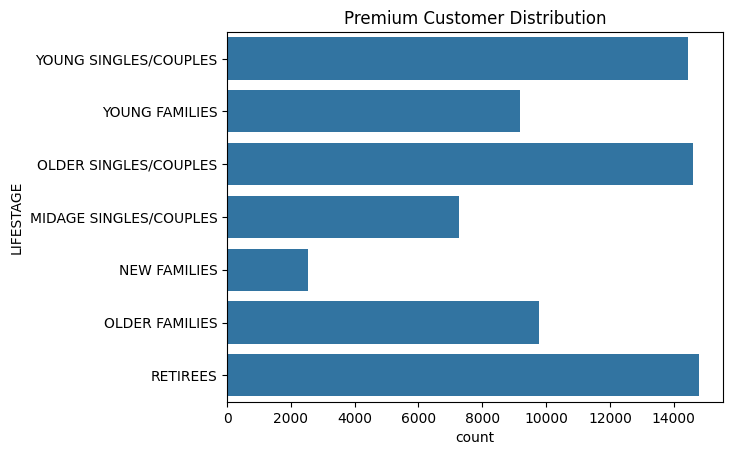

In [45]:
sns.countplot(purchase['LIFESTAGE'])
plt.title("Premium Customer Distribution")
plt.show()